# Random Forest Parkside
In der Analyse der Daten wurde erkannt, dass das Parkhaus Parkside sehr regelmässige Daten hat. Deshalb wurde entschieden ein möglichst gutes Model nur für dieses Parkhaus zu trainieren.

In [18]:
# Pandas Numby wird importiert
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GroupKFold

# Random Forest wird importiert
from sklearn.ensemble import RandomForestRegressor

import joblib

Anhand des unteren Plots sieht man gut das die Vermutung aus dem Notebook 2a sich bestätigen. Die Parkhäuser haben eine Wellenmässige regelmässigkeit.

In [19]:
df = pd.read_pickle("./data.pkl")
df = df[df['parking_id'] == 'parkside']

In [20]:
# (Information 1) bessere Resultate durch entfernen von unrgelmässigen monaten dezember und janaur
#df = df[df['month'] != 12]
#df = df[df['month'] != 1]
#df['month'].unique()

In [21]:
forest = RandomForestRegressor(n_estimators=9)

def data_kfold_train(data, n_splits = 10):
    X = data[['day_of_week', 'is_weekend', 'hour']]
    y = data['free_parking_0']
    groups = data['month']
    group_kfold = GroupKFold(n_splits=n_splits)

    scores = []
    best_model = (0,)
    for train_index, test_index in group_kfold.split(X, y, groups):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        forest = RandomForestRegressor(n_estimators=9)
        forest.fit(X_train, y_train)
        score = forest.score(X_test, y_test)
        
        # Ausgabe
        test_month = df.iloc[test_index].month.unique()
        train_month = df.iloc[train_index].month.unique()
        
        #print(score)
        first_tree = forest.estimators_[0]
        feat_imp = pd.Series(forest.feature_importances_, index=X.columns)
        #print(feat_imp.sort_values(ascending=False))
        scores.append(score)
        
        if score > best_model[0]:
            best_model = (score, feat_imp, forest, test_month, train_month)
    return (scores, best_model)

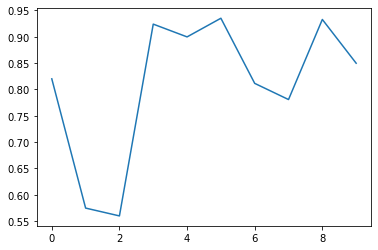

Best Score 0.9347770395692779
Test Month: [11]
Train Month: [ 4  3 12 10  9  7  1  8  2]

Feature Importance best Model
hour           0.674145
is_weekend     0.200782
day_of_week    0.125073
dtype: float64


In [22]:
scores, best_model = data_kfold_train(df, df['month'].unique().size)
best_score, feat_imp, forest, test_month, train_month = best_model

plt.plot(scores)
plt.show()
print("Best Score " + str(best_score))
print("Test Month: " + str(test_month))
print("Train Month: " + str(train_month))
print("")
print("Feature Importance best Model")
print(feat_imp.sort_values(ascending=False))

In [23]:
# Export 
joblib.dump(forest, "RF_parkside.joblib", compress=0)

['RF_parkside.joblib']

# Resultat
Die tiefen Werte aus stündlichen Vorhersagequalität (hour [0.67]) sind durch die Unregelmässigkeiten im Januar und Dezember zu erklären (ist in der Analyse 1b ersichtlich). Durch das Entfernen dieser Monate konnte sehr gute Vorhersagequalitäten (hour [0.75]) erreicht werden (siehe Information 1, freischalten der Kommentierten 3 Zeilen df = df[df['month'] != 12]
df = df[df['month'] != 1]
df['month'].unique()).

Die Daten werden zwecks späterer Wiederverwendung für Hervorsagen, in eigenen Files zwischengespeichert.